<a href="https://colab.research.google.com/github/PiyumiHerath/Test/blob/main/NN_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv("/content/drive/MyDrive/wine/dataNN.csv", sep=";")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"6,148,72,35,0,33.6,0.627,50,1"
0,"1,85,66,29,0,26.6,0.351,31,0"
1,"8,183,64,0,0,23.3,0.672,32,1"
2,"1,89,66,23,94,28.1,0.167,21,0"
3,"0,137,40,35,168,43.1,2.288,33,1"
4,"5,116,74,0,0,25.6,0.201,30,0"


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'precision'])


In [ ]:
# Compile the model with Adam optimizer and precision metric
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
print(X_train.shape)


(613, 0)


In [36]:
print(data.head())


     6,148,72,35,0,33.6,0.627,50,1
0     1,85,66,29,0,26.6,0.351,31,0
1     8,183,64,0,0,23.3,0.672,32,1
2    1,89,66,23,94,28.1,0.167,21,0
3  0,137,40,35,168,43.1,2.288,33,1
4     5,116,74,0,0,25.6,0.201,30,0


   Number of times pregnant  Plasma glucose concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   
3                         1                            89   
4                         0                           137   

   Diastolic blood pressure  Triceps skin fold thickness  \
0                        72                           35   
1                        66                           29   
2                        64                            0   
3                        66                           23   
4                        40                           35   

   2-Hour serum insulin  Body mass index  Diabetes pedigree function  Age  \
0                     0             33.6                       0.627   50   
1                     0             26.6                       0.351   31   
2                     0             23.3 

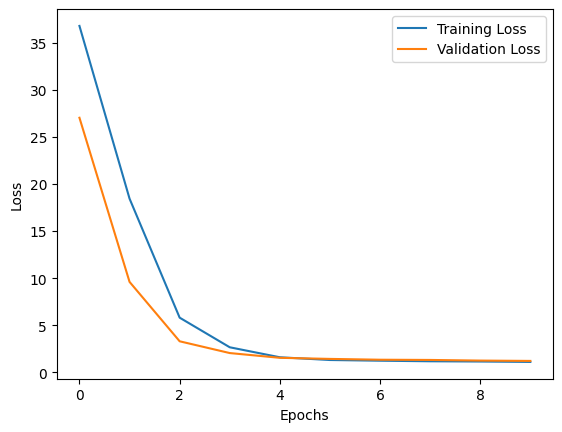

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming your CSV file has no column headers, so we define them
column_names = [
    "Number of times pregnant",
    "Plasma glucose concentration",
    "Diastolic blood pressure",
    "Triceps skin fold thickness",
    "2-Hour serum insulin",
    "Body mass index",
    "Diabetes pedigree function",
    "Age",
    "Class"
]

# Update the file path
file_path = '/content/drive/MyDrive/wine/dataNN.csv'

# Read the CSV file with the specified column names
data = pd.read_csv(file_path, names=column_names)

# Display the first few rows of the data
print(data.head())

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming your dataset has 8 features
input_dim = 8

# Create a Sequential model
model = Sequential()

# Add a Dense layer with the correct input dimension
model.add(Dense(units=16, activation='relu', input_dim=input_dim))

# Add more Dense layers or other layers as needed
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to check the architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
